#Dataset

##Loading the Dataset:

In [ ]:
import pandas as pd

# Read the individual CSV files
btc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Bitcoin.csv")
eth_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Ethereum.csv")
xrp_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_XRP.csv")
ltc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Litecoin.csv")
usdc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_USDCoin.csv")

# Concatenate the datasets vertically
df = pd.concat([btc_df, eth_df, xrp_df, ltc_df, usdc_df])

# Save the merged dataset to a new CSV file
df.to_csv("cryptocurrency.csv", index=False)



#EDA

##Summarizing the Dataset:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# Read the individual CSV files
btc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Bitcoin.csv")
eth_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Ethereum.csv")
xrp_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_XRP.csv")
ltc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_Litecoin.csv")
usdc_df = pd.read_csv("https://raw.githubusercontent.com/Amarpreet3/CIND-820-CAPSTONE/main/Dataset/coin_USDCoin.csv")

# Concatenate the datasets vertically
df = pd.concat([btc_df, eth_df, xrp_df, ltc_df, usdc_df])

# Save the merged dataset to a new CSV file
df.to_csv("cryptocurrency.csv", index=False)



In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

In [ ]:
df.tail()

SNo      Name Symbol                 Date      High       Low  \
997    998  USD Coin   USDC  2021-07-02 23:59:59  1.000916  0.999966   
998    999  USD Coin   USDC  2021-07-03 23:59:59  1.000670  0.999925   
999   1000  USD Coin   USDC  2021-07-04 23:59:59  1.000187  0.998901   
1000  1001  USD Coin   USDC  2021-07-05 23:59:59  1.000839  0.999459   
1001  1002  USD Coin   USDC  2021-07-06 23:59:59  1.000731  0.999662   

          Open     Close        Volume     Marketcap  
997   1.000177  1.000035  1.787896e+09  2.539775e+10  
998   1.000048  0.999984  1.491017e+09  2.550437e+10  
999   0.999956  0.999500  1.578667e+09  2.551172e+10  
1000  0.999565  1.000528  1.887496e+09  2.554724e+10  
1001  1.000501  1.000059  2.312602e+09  2.567322e+10

In [ ]:
df.Name.unique()

array(['Bitcoin', 'Ethereum', 'XRP', 'Litecoin', 'USD Coin'], dtype=object)

In [ ]:
df.Symbol.unique()

array(['BTC', 'ETH', 'XRP', 'LTC', 'USDC'], dtype=object)

In [ ]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [ ]:
df['Name'].value_counts()

Bitcoin     2991
Litecoin    2991
XRP         2893
Ethereum    2160
USD Coin    1002
Name: Name, dtype: int64

In [ ]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:

print(df.dtypes)

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object


In [ ]:
df.isnull().count()

SNo          12037
Name         12037
Symbol       12037
Date         12037
High         12037
Low          12037
Open         12037
Close        12037
Volume       12037
Marketcap    12037
dtype: int64

In [ ]:

# Get the shape of the merged dataset
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 12037
Number of columns: 10


In [ ]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12037 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        12037 non-null  int64  
 1   Name       12037 non-null  object 
 2   Symbol     12037 non-null  object 
 3   Date       12037 non-null  object 
 4   High       12037 non-null  float64
 5   Low        12037 non-null  float64
 6   Open       12037 non-null  float64
 7   Close      12037 non-null  float64
 8   Volume     12037 non-null  float64
 9   Marketcap  12037 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
# Display summary statistics of numeric columns
numeric_columns = df.select_dtypes(include=[int, float])
summary_statistics = numeric_columns.describe()
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
                SNo          High           Low          Open         Close  \
count  12037.000000  12037.000000  12037.000000  12037.000000  12037.000000   
mean    1326.877627   1797.247945   1689.071077   1745.961716   1748.923766   
std      836.777590   6507.990175   6085.346811   6312.961050   6319.601286   
min        1.000000      0.003082      0.002802      0.002809      0.002810   
25%      602.000000      1.000692      0.990570      0.999090      0.999228   
50%     1255.000000     33.345750     30.523111     32.016525     32.001958   
75%     2007.000000    372.767424    350.941986    360.312012    361.045990   
max     2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  1.203700e+04  1.203700e+04  
mean   4.652802e+09  4.082986e+10  
std    1.141572e+10  1.194340e+11  
min    0.000000e+00  0.000000e+00  
25%    5.895540e+06  3.682208e+08  
50%    3.204215e+08  5.655924e+09  
75%    3.146472e

In [ ]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

SNo          High           Low          Open         Close  \
count  12037.000000  12037.000000  12037.000000  12037.000000  12037.000000   
mean    1326.877627   1797.247945   1689.071077   1745.961716   1748.923766   
std      836.777590   6507.990175   6085.346811   6312.961050   6319.601286   
min        1.000000      0.003082      0.002802      0.002809      0.002810   
25%      602.000000      1.000692      0.990570      0.999090      0.999228   
50%     1255.000000     33.345750     30.523111     32.016525     32.001958   
75%     2007.000000    372.767424    350.941986    360.312012    361.045990   
max     2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  1.203700e+04  1.203700e+04  
mean   4.652802e+09  4.082986e+10  
std    1.141572e+10  1.194340e+11  
min    0.000000e+00  0.000000e+00  
25%    5.895540e+06  3.682208e+08  
50%    3.204215e+08  5.655924e+09  
75%    3.146472e+09  2.090613e+10  
max    3.509679e+11  1.186364e+12

In [ ]:
df.describe().transpose()

count          mean           std       min           25%  \
SNo        12037.0  1.326878e+03  8.367776e+02  1.000000  6.020000e+02   
High       12037.0  1.797248e+03  6.507990e+03  0.003082  1.000692e+00   
Low        12037.0  1.689071e+03  6.085347e+03  0.002802  9.905703e-01   
Open       12037.0  1.745962e+03  6.312961e+03  0.002809  9.990903e-01   
Close      12037.0  1.748924e+03  6.319601e+03  0.002810  9.992283e-01   
Volume     12037.0  4.652802e+09  1.141572e+10  0.000000  5.895540e+06   
Marketcap  12037.0  4.082986e+10  1.194340e+11  0.000000  3.682208e+08   

                    50%           75%           max  
SNo        1.255000e+03  2.007000e+03  2.991000e+03  
High       3.334575e+01  3.727674e+02  6.486310e+04  
Low        3.052311e+01  3.509420e+02  6.220896e+04  
Open       3.201653e+01  3.603120e+02  6.352375e+04  
Close      3.200196e+01  3.610460e+02  6.350346e+04  
Volume     3.204215e+08  3.146472e+09  3.509679e+11  
Marketcap  5.655924e+09  2.090613e+10  1.186364e+12

In [ ]:

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by each coin
grouped_df = df.groupby('Symbol')

# Calculate the date duration for each coin and describtion
for symbol, group in grouped_df:
    min_date = group['Date'].min()
    max_date = group['Date'].max()
    duration = max_date - min_date
    
    print("Coin:", symbol)
    print("Start Date:", min_date)
    print("End Date:", max_date)
    print("Date Duration:", duration)
    print(group.describe().transpose())
    print()


Coin: BTC
Start Date: 2013-04-29 23:59:59
End Date: 2021-07-06 23:59:59
Date Duration: 2990 days 00:00:00
            count          mean           std           min           25%  \
SNo        2991.0  1.496000e+03  8.635717e+02  1.000000e+00  7.485000e+02   
High       2991.0  6.893326e+03  1.164283e+04  7.456110e+01  4.361790e+02   
Low        2991.0  6.486010e+03  1.086903e+04  6.552600e+01  4.228795e+02   
Open       2991.0  6.700146e+03  1.128804e+04  6.850500e+01  4.304455e+02   
Close      2991.0  6.711290e+03  1.129814e+04  6.843100e+01  4.305695e+02   
Volume     2991.0  1.090633e+10  1.888895e+10  0.000000e+00  3.036725e+07   
Marketcap  2991.0  1.208761e+11  2.109438e+11  7.784112e+08  6.305579e+09   

                    50%           75%           max  
SNo        1.496000e+03  2.243500e+03  2.991000e+03  
High       2.387610e+03  8.733927e+03  6.486310e+04  
Low        2.178500e+03  8.289800e+03  6.220896e+04  
Open       2.269890e+03  8.569656e+03  6.352375e+04  
Close  

###Categorical to One-Hot (numeric) Encoding

In [ ]:
df.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

In [ ]:
#Let's create a list for our categorical columns
cat_cols=["Name", "Symbol", "Date"]

In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

SNo        High         Low        Open       Close        Volume  \
0        1  147.488007  134.000000  134.444000  144.539993  0.000000e+00   
1        2  146.929993  134.050003  144.000000  139.000000  0.000000e+00   
2        3  139.889999  107.720001  139.000000  116.989998  0.000000e+00   
3        4  125.599998   92.281898  116.379997  105.209999  0.000000e+00   
4        5  108.127998   79.099998  106.250000   97.750000  0.000000e+00   
...    ...         ...         ...         ...         ...           ...   
997    998    1.000916    0.999966    1.000177    1.000035  1.787896e+09   
998    999    1.000670    0.999925    1.000048    0.999984  1.491017e+09   
999   1000    1.000187    0.998901    0.999956    0.999500  1.578667e+09   
1000  1001    1.000839    0.999459    0.999565    1.000528  1.887496e+09   
1001  1002    1.000731    0.999662    1.000501    1.000059  2.312602e+09   

         Marketcap  Name_Bitcoin  Name_Ethereum  Name_Litecoin  ...  \
0     1.603769e+09             1              0              0  ...   
1     1.542813e+09             1              0              0  ...   
2     1.298955e+09             1              0              0  ...   
3     1.168517e+09             1              0              0  ...   
4     1.085995e+09             1              0              0  ...   
...            ...           ...            ...            ...  ...   
997   2.539775e+10             0              0              0  ...   
998   2.550437e+10             0              0              0  ...   
999   2.551172e+10             0              0              0  ...   
1000  2.554724e+10             0              0              0  ...   
1001  2.567322e+10             0              0              0  ...   

      Date_2021-06-27 23:59:59  Date_2021-06-28 23:59:59  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
997                          0                         0   
998                          0                         0   
999                          0                         0   
1000                         0                         0   
1001                         0                         0   

      Date_2021-06-29 23:59:59  Date_2021-06-30 23:59:59  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
997                          0                         0   
998                          0                         0   
999                          0                         0   
1000                         0                         0   
1001                         0                         0   

      Date_2021-07-01 23:59:59  Date_2021-07-02 23:59:59  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
997                          0                         1   
998                          0                         0   
999                          0                         0   
1000                         0                         0   
1001                         0                         0   

      Date_2021-07-03 23:59:59  Date_2021-07-04 23:59:59  \
0                 

##Pandas Profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

<ipython-input-51-ce1e41813c97>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Visualizing the Data:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#DataFrame copied to keep the original unaltered
df_visual = df.copy()

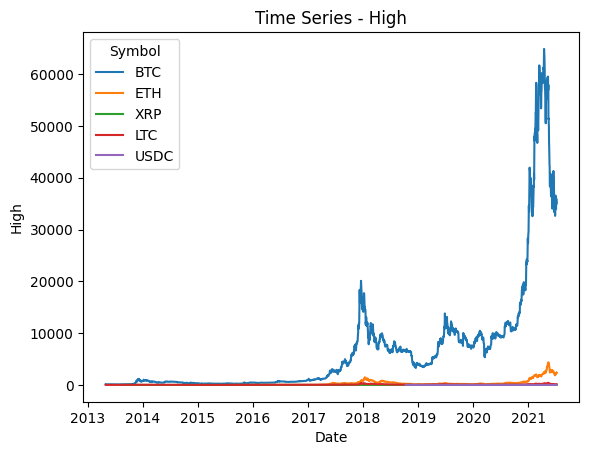

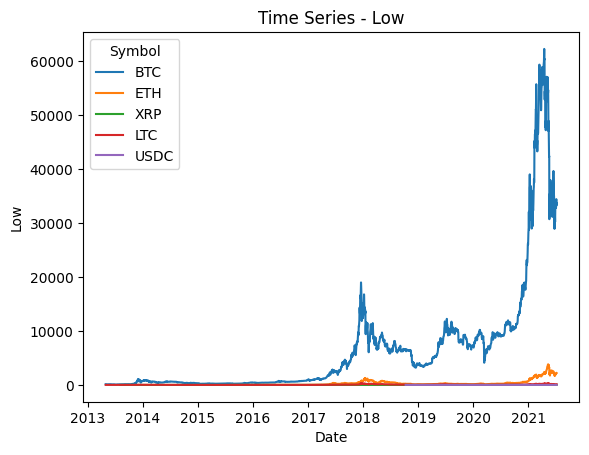

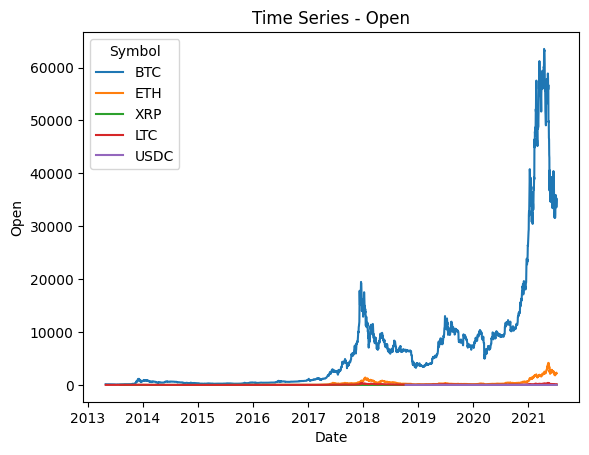

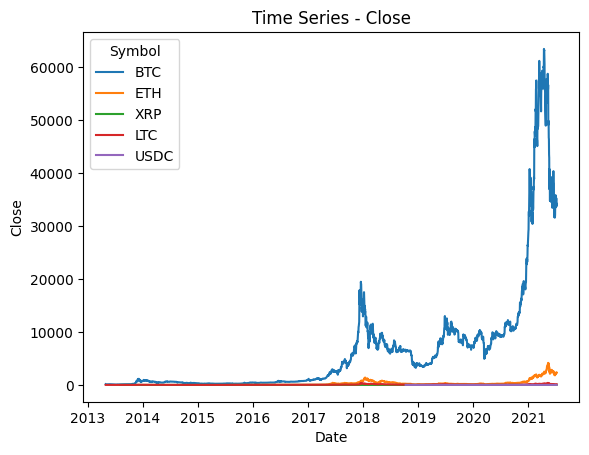

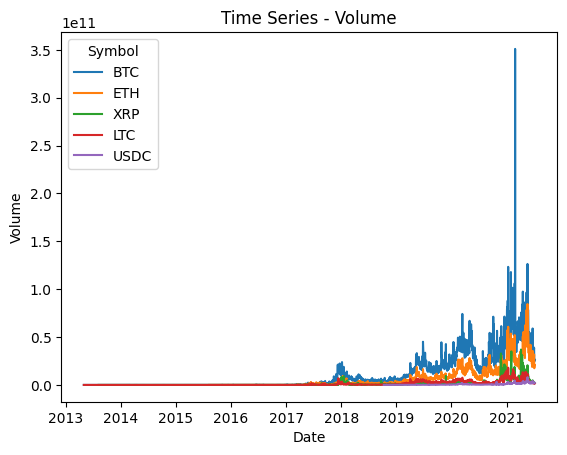

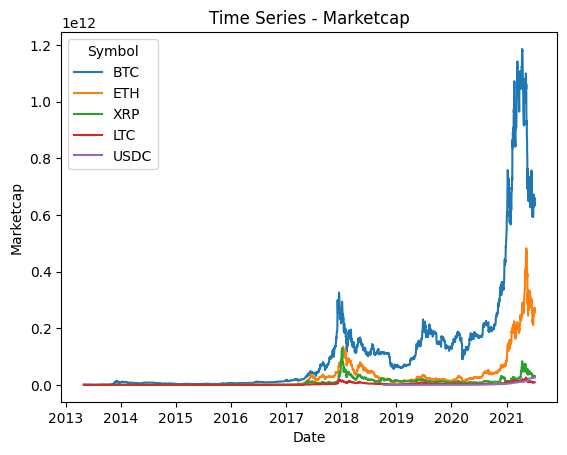

In [ ]:

# List of columns to visualize
columns_to_visualize = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Loop through each column
for column in columns_to_visualize:
    # Set up the plot for the current column
    sns.lineplot(data=df_visual, x='Date', y=column, hue='Symbol')
    
    # Add title and labels
    plt.title(f'Time Series - {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    
    # Display the plot
    plt.show()


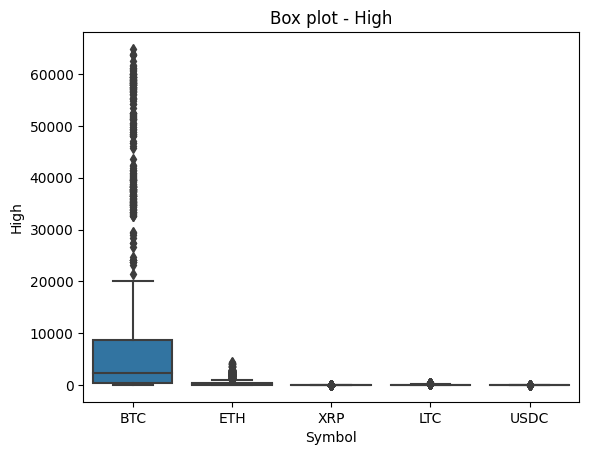

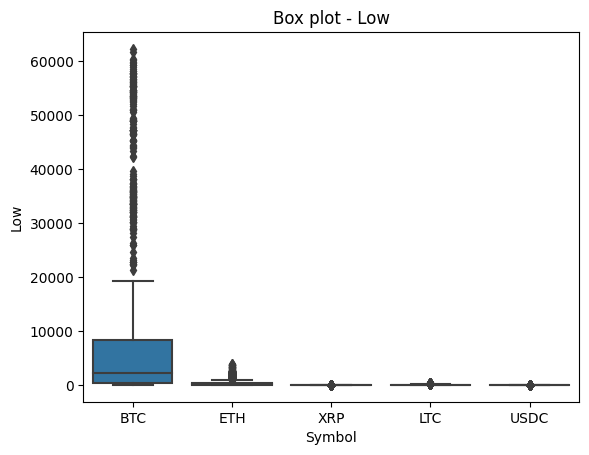

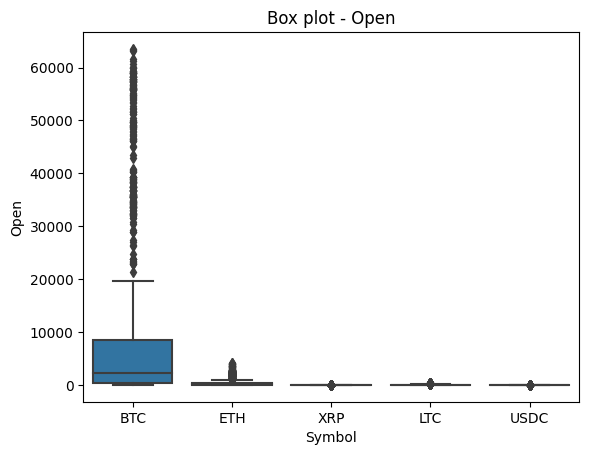

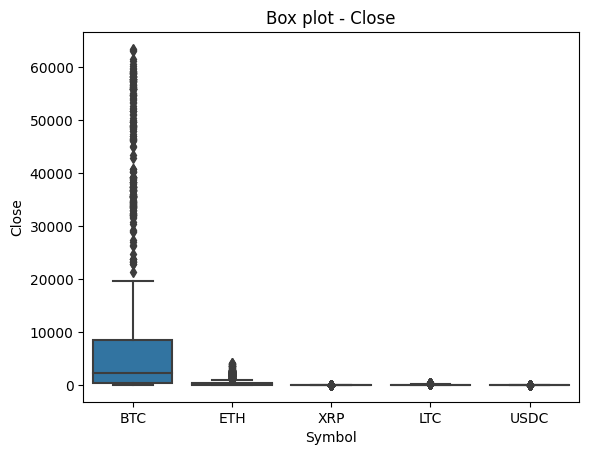

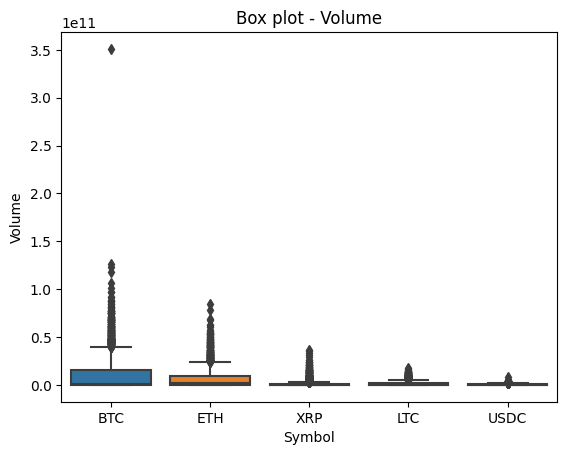

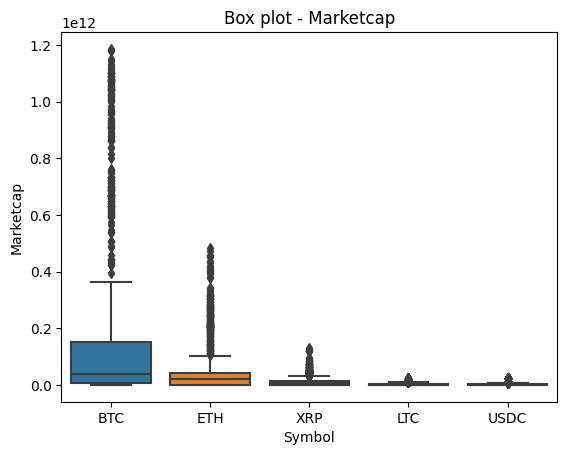

In [ ]:

# Loop through each column
for column in columns_to_visualize:
    # Set up the boxplot for the current column
    sns.boxplot(x='Symbol', y=column, data=df_visual)
    
    # Add title and labels
    plt.title(f'Box plot - {column}')
    plt.xlabel('Symbol')
    plt.ylabel(column)
    
    # Display the plot
    plt.show()
